# Prediction of Diabetes from available datasets using Logistic Regression Algo & Deep Learning.
#By- Shubham Kumar
#Dated- November 11,2021

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'/home/aarush100616/Downloads/Projects/Diabetes Prediction/diabetes.csv')

In [5]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

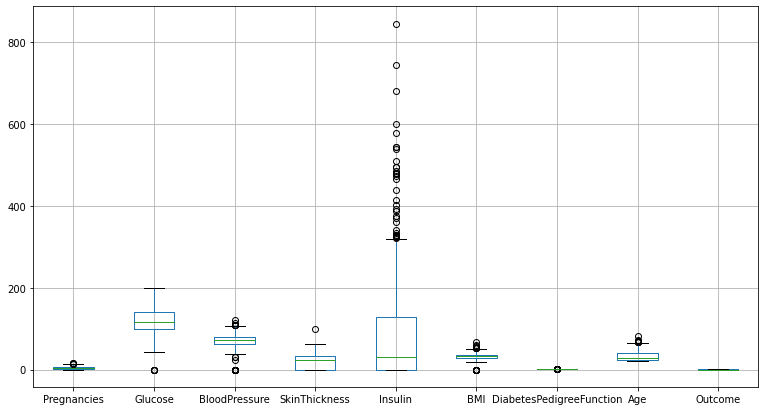

In [18]:
df.boxplot(figsize=(13,7))
plt.show()

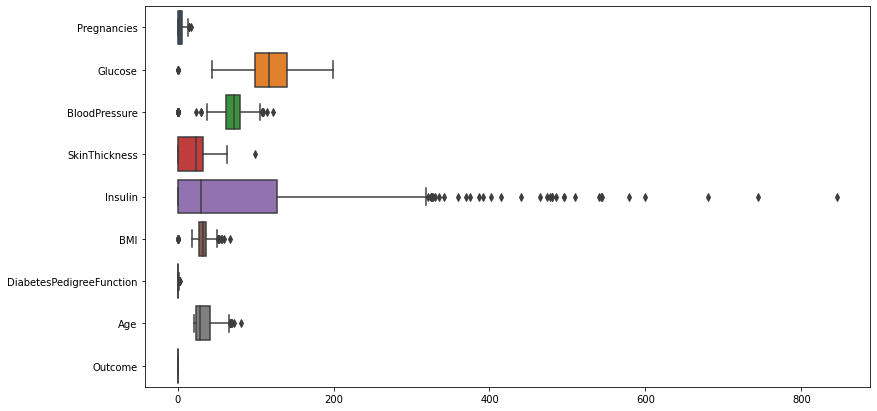

In [19]:
plt.figure(figsize=(13,7))
sns.boxplot(data=df,orient='h')
plt.show()

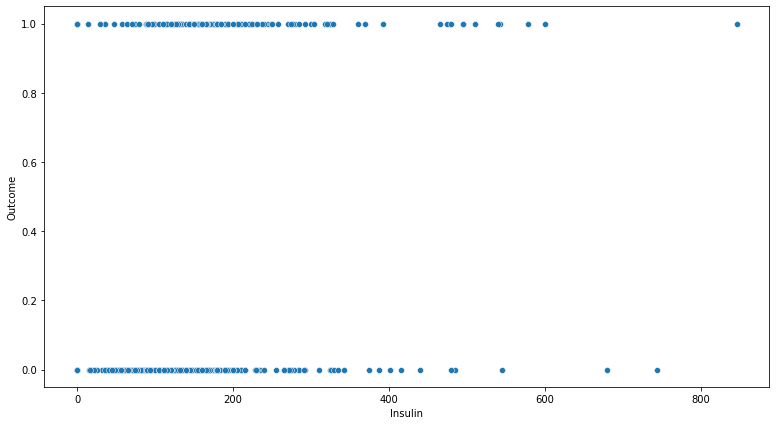

In [21]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])
plt.show()

#Replacing 0 with respective column.

In [27]:
X=df.drop('Outcome',axis=1)

In [28]:
Y=df['Outcome']

In [29]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [30]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [31]:
X.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [32]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [33]:
X.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.400782  121.681605      72.254807      26.606479  118.660163   
std       2.984162   30.436016      12.115932       9.631241   93.080358   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.845052  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    32.450805                  0.471876   33.240885  
std      6.875374                  0.331329   11.760232  
min     18.200000                  0.078000   21.000000  
25%     27.500000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

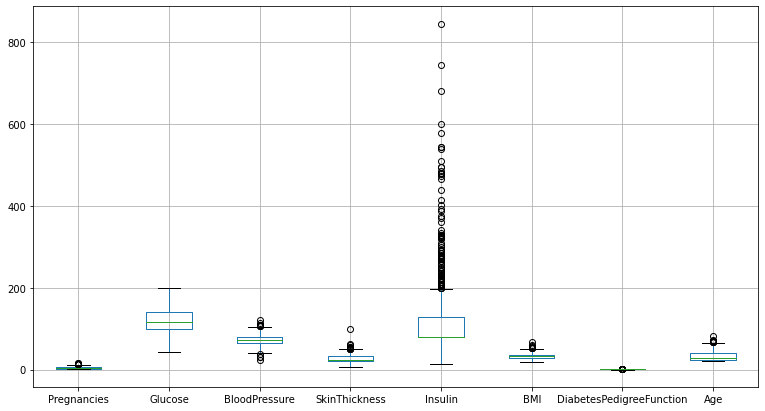

In [34]:
X.boxplot(figsize=(13,7))
plt.show()

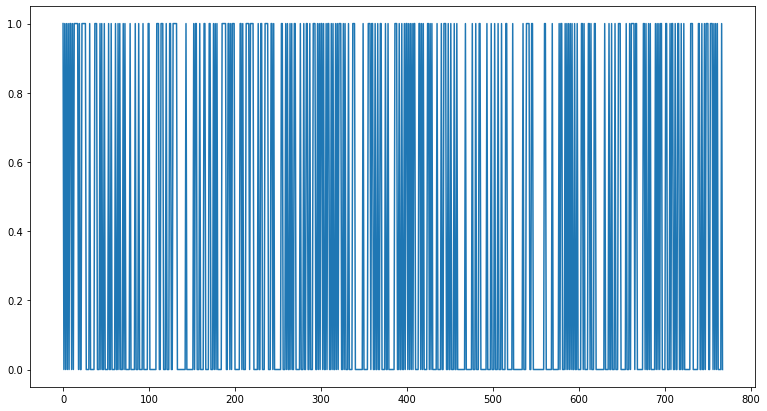

In [39]:
Y.plot(figsize=(13,7))
plt.show()

Splitting data for training & testing.

In [40]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [41]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=None)

In [44]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
570     3.000000     78.0      70.000000      20.536458   79.799479  32.5   
238     9.000000    164.0      84.000000      21.000000   79.799479  30.8   
86     13.000000    106.0      72.000000      54.000000   79.799479  36.6   
317     3.000000    182.0      74.000000      20.536458   79.799479  30.5   
709     2.000000     93.0      64.000000      32.000000  160.000000  38.0   
..           ...      ...            ...            ...         ...   ...   
454     2.000000    100.0      54.000000      28.000000  105.000000  37.8   
390     1.000000    100.0      66.000000      29.000000  196.000000  32.0   
703     2.000000    129.0      69.105469      20.536458   79.799479  38.5   
722     1.000000    149.0      68.000000      29.000000  127.000000  29.3   
627     3.845052    132.0      78.000000      20.536458   79.799479  32.4   

     DiabetesPedigreeFunction  Age  
570                     0.270   39  
238                     0.831   32  
86                      0.178   45  
317                     0.345   29  
709                     0.674   23  
..                        ...  ...  
454                     0.498   24  
390                     0.444   42  
703                     0.304   41  
722                     0.349   42  
627                     0.393   21  

[576 rows x 8 columns]

In [45]:
Y_train

570    0
238    1
86     0
317    1
709    1
      ..
454    0
390    0
703    0
722    1
627    0
Name: Outcome, Length: 576, dtype: int64

In [46]:
Y_train.value_counts()

0    370
1    206
Name: Outcome, dtype: int64

Standard Scalar

In [47]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [48]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [49]:
X_train_std

array([[-0.45443142, -1.43007939, -0.21090128, ..., -0.02315955,
        -0.60915304,  0.51652605],
       [ 1.60688308,  1.44335392,  0.93818019, ..., -0.26985671,
         1.0730039 , -0.09154199],
       [ 2.98109275, -0.49454296, -0.04674678, ...,  0.57181597,
        -0.88501479,  1.03772722],
       ...,
       [-0.79798384,  0.27393339, -0.28432194, ...,  0.84753633,
        -0.50720413,  0.69025977],
       [-1.14153625,  0.94217369, -0.37505577, ..., -0.48753068,
        -0.37227176,  0.77712663],
       [-0.16411173,  0.37416943,  0.4457167 , ..., -0.03767115,
        -0.24033788, -1.04707747]])

Training of model(Logistic Regression)

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [51]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [52]:
Y_pred=lr.predict(X_test_std)

In [53]:
Y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [54]:
Y_test

359    1
89     0
534    0
195    1
589    0
      ..
162    0
664    1
718    0
452    0
677    0
Name: Outcome, Length: 192, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_test,Y_pred) 

0.796875

In [57]:
accuracy_score(Y_test,Y_pred) * 100

79.6875

Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [59]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [60]:
Y_pred=dt.predict(X_test_std)

In [61]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [62]:
Y_test

359    1
89     0
534    0
195    1
589    0
      ..
162    0
664    1
718    0
452    0
677    0
Name: Outcome, Length: 192, dtype: int64

In [63]:
accuracy_score(Y_test,Y_pred)

0.71875

In [64]:
accuracy_score(Y_test,Y_pred)*100

71.875

Deep Learning

In [65]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(8,8))

In [66]:
mlp.fit(X_train_std,Y_train)

/home/aarush100616/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(8, 8))

In [67]:
Y_pred=mlp.predict(X_test_std)

In [68]:
accuracy_score(Y_test,Y_pred)

0.75

In [69]:
accuracy_score(Y_test,Y_pred)*100

75.0